In [1]:
#Import library pandas
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [2]:
#Use read_excel function to read excel function, add engine = 'openpyxl' to ensure it can read xlsx file
nmc_df = pd.read_csv('NMC_5_0.csv')
nmc_df


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039697,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011
...,...,...,...,...,...,...,...,...,...,...,...
15166,WSM,990,2008,0,0,0,39,183.0,0.0,0.000005,2011
15167,WSM,990,2009,0,0,0,38,185.0,0.0,0.000005,2011
15168,WSM,990,2010,0,0,0,38,186.0,0.0,0.000005,2011
15169,WSM,990,2011,0,0,0,38,187.0,0.0,0.000005,2011


# Q3

In [3]:
top10_country = list(nmc_df.loc[nmc_df['year'] == 2012].sort_values(by=['cinc'],ascending=False).head(10).stateabb)
top10_country

['CHN', 'USA', 'IND', 'RUS', 'JPN', 'BRA', 'ROK', 'GMY', 'IRN', 'UKG']

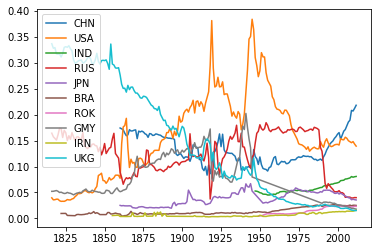

In [4]:
year = []
cinc = []
i = 0
for country in top10_country:
    year.append(list(nmc_df.loc[nmc_df['stateabb'] == country].year))
    cinc.append(list(nmc_df.loc[nmc_df['stateabb'] == country].cinc))
    plt.plot(year[i], cinc[i], label = country)
    i = i + 1
plt.legend()
plt.show()

The top 10 "most capable" in year 2012 is China, USA, India, Russia, Japan, Brazil, South Korea, Germany, Iran, UK. By observing the changes in "cinc" for these 10 "most capable" countries over time, it is easy to find that the change in the cinc is associated with historical change. For example, there are two peaks in 1925 and 1950, and there is a large decrease between and after these two periods. The former decrease is probably due to the Great Depression, while the later one could be attributed to the beginning of the Korean War and Vietnam War. The increase of the cinc at the end of 80s of China is due to the Opening-up policies instituted by the Chinese government. Besides, there is a great decrease for Russia at the end of 80s which is the direct result of the dissolution of the USSR. 

# Q4

In [5]:
new_df = pd.DataFrame()
for country in top10_country:
    new_df = new_df.append(nmc_df[nmc_df['stateabb'] == country])

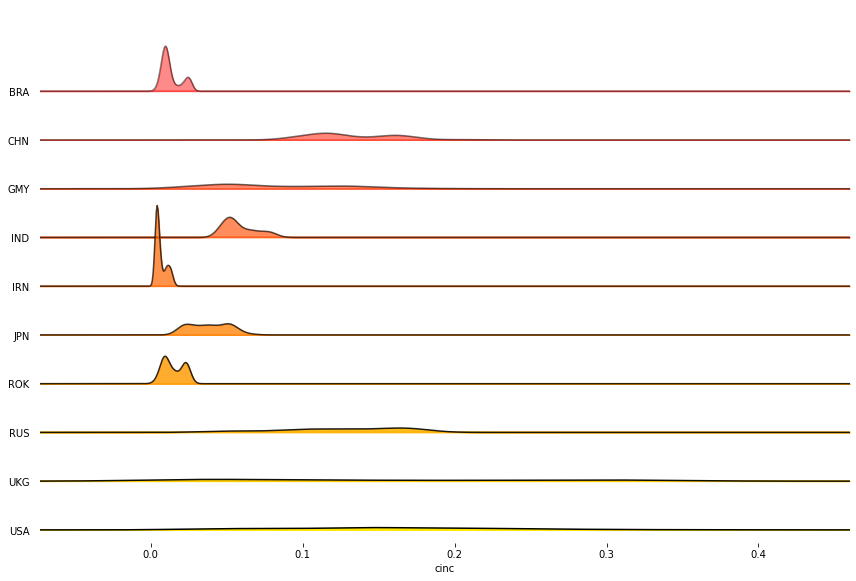

In [6]:
! pip install joypy
from joypy import joyplot
joyplot(new_df, by = 'stateabb', column = 'cinc',colormap=cm.autumn, fade = True, figsize=(12, 8))
plt.xlabel("cinc")
plt.show()

By obersving the ridgeline plot, Iran, ROK and BRA have an approximate bimodal distribution. The distribution of IND is right-skewed. Countries with high peaks indicates that the cinc value barely changed over the years, while for those relatively-flat distribution, the cinc value changed a lot during these years like USA, UKG etc.  Reflecting the ridgeline plot with the line graph in Q3, the relatively-flat distribution corresponds with the line graph that shows  a clear trend. 

# Q5

In [7]:
nmc_2012_df = nmc_df.loc[nmc_df['year'] == 2012]

In [8]:
nmc_2012_df = nmc_2012_df.drop(["year","version","ccode"],axis = 1)

In [9]:
nmc_2012_df_1 = nmc_2012_df.set_index('stateabb')

In [10]:
nmc_2012_df_1

,milex,milper,irst,pec,tpop,upop,cinc
stateabb,,,,,,,
USA,655388000,1569,88695,3159873,317505.0,183712.0,1.393526e-01
CAN,18445000,66,13507,343023,34838.0,20647.0,9.155200e-03
BHM,55000,1,0,261,372.0,0.0,2.490000e-05
CUB,-9,49,277,16460,11271.0,2931.0,1.278100e-03
HAI,-9,0,0,4883,10174.0,2255.0,5.524000e-04
...,...,...,...,...,...,...,...
NAU,0,0,0,3,10.0,0.0,2.600000e-07
MSI,0,0,0,14,53.0,0.0,1.360000e-06
PAL,0,0,0,12,21.0,0.0,5.910000e-07


In [11]:
nmc_2012_df_1.corr()

,milex,milper,irst,pec,tpop,upop,cinc
milex,1.000000,0.555008,0.282977,0.632414,0.301069,0.487709,0.646509
milper,0.555008,1.000000,0.726129,0.851630,0.800926,0.859919,0.892828
irst,0.282977,0.726129,1.000000,0.901660,0.787834,0.889671,0.881858
pec,0.632414,0.851630,0.901660,1.000000,0.816074,0.940502,0.988420
tpop,0.301069,0.800926,0.787834,0.816074,1.000000,0.936735,0.858843
upop,0.487709,0.859919,0.889671,0.940502,0.936735,1.000000,0.966284
cinc,0.646509,0.892828,0.881858,0.988420,0.858843,0.966284,1.000000


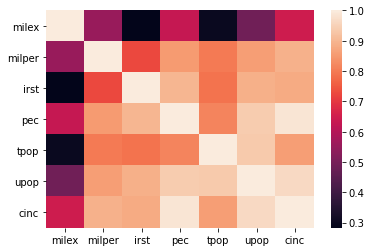

In [12]:
ax = sns.heatmap(nmc_2012_df_1.corr())

Correlations between Irst and Pec, Pec and Upop, Upop and Tpop, and Cinc with all other variable are very high. Variables like Upop and Tpop might be correlated by nature, for the urban population is part of the total population. Pec and Upop are also correlated by nature, for the number of primary energy consumption are determined by the population in the urban areas.

# Q6

In [13]:
scaled = MinMaxScaler().fit_transform(nmc_2012_df_1)
nmc_2012_df_1= pd.DataFrame(scaled)
#Change the column to its name
nmc_2012_df_1.columns = ["milex", "milper", "irst", "pec", "tpop", "upop","cinc"]
#Change the index to its name
nmc_2012_df_1 = nmc_2012_df_1.set_index(nmc_2012_df["stateabb"])
#nmc_2012_df = nmc_2012_df.rename(index={0: 'milex',1:'milper',2:'irst',3:'pec',4:'tpop',5:'upop',6:"cinc"})
nmc_2012_df_1

,milex,milper,irst,pec,tpop,upop,cinc
stateabb,,,,,,,
USA,1.000000e+00,0.687881,0.121327,0.592435,0.230561,0.417286,6.388900e-01
CAN,2.814365e-02,0.032694,0.018476,0.064314,0.025292,0.046898,4.197281e-02
BHM,8.393349e-05,0.004359,0.000000,0.000051,0.000263,0.000000,1.130406e-04
CUB,0.000000e+00,0.025283,0.000379,0.003088,0.008178,0.006658,5.858598e-03
HAI,0.000000e+00,0.003923,0.000000,0.000917,0.007381,0.005122,2.531475e-03
...,...,...,...,...,...,...,...
NAU,1.373232e-08,0.003923,0.000000,0.000002,0.000000,0.000000,7.335534e-08
MSI,1.373232e-08,0.003923,0.000000,0.000004,0.000031,0.000000,5.116535e-06
PAL,1.373232e-08,0.003923,0.000000,0.000004,0.000008,0.000000,1.590894e-06


In [14]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
eu_dis_df = pd.DataFrame(euclidean_distances(scaled,scaled))
eu_dis_df.columns = nmc_2012_df["stateabb"]
eu_dis_df = eu_dis_df.set_index(nmc_2012_df["stateabb"])
eu_dis_df

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
USA,0.000000,1.482869,1.570947,1.555569,1.567499,1.561133,1.569446,1.566222,1.570993,1.571283,...,1.571208,1.571279,1.571293e+00,1.570250,1.571279,1.571293,1.571286,1.571291,1.571218,1.571263
CAN,1.482869,0.000000,0.103148,0.090220,0.097990,0.093373,0.101323,0.097018,0.103191,0.103416,...,0.103306,0.103411,1.034313e-01,0.102637,0.103409,0.103431,0.103420,0.103427,0.103321,0.103387
BHM,1.570947,0.103148,0.000000,0.024232,0.009149,0.015234,0.002492,0.007785,0.000078,0.000508,...,0.000467,0.000499,5.304044e-04,0.001369,0.000497,0.000530,0.000514,0.000526,0.000460,0.000474
CUB,1.555569,0.090220,0.024232,0.000000,0.021798,0.010891,0.022390,0.022645,0.024260,0.024710,...,0.024585,0.024703,2.472726e-02,0.022947,0.024702,0.024727,0.024715,0.024724,0.024598,0.024679
HAI,1.567499,0.097990,0.009149,0.021798,0.000000,0.011236,0.006949,0.010614,0.009206,0.009341,...,0.009056,0.009324,9.378709e-03,0.008983,0.009322,0.009379,0.009353,0.009372,0.009084,0.009270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAU,1.571293,0.103431,0.000530,0.024727,0.009379,0.015694,0.002895,0.007980,0.000491,0.000046,...,0.000397,0.000067,3.820809e-07,0.001878,0.000070,0.000000,0.000032,0.000008,0.000363,0.000132
MSI,1.571286,0.103420,0.000514,0.024715,0.009353,0.015677,0.002872,0.007973,0.000478,0.000014,...,0.000365,0.000035,3.173620e-05,0.001867,0.000038,0.000032,0.000000,0.000024,0.000331,0.000100
PAL,1.571291,0.103427,0.000526,0.024724,0.009372,0.015689,0.002889,0.007977,0.000487,0.000037,...,0.000389,0.000059,8.401986e-06,0.001875,0.000062,0.000008,0.000024,0.000000,0.000355,0.000124


In [15]:
man_dis_df = pd.DataFrame(manhattan_distances(scaled,scaled))
man_dis_df.columns = nmc_2012_df["stateabb"]
man_dis_df = man_dis_df.set_index(nmc_2012_df["stateabb"])
man_dis_df

stateabb,USA,CAN,BHM,CUB,HAI,DOM,JAM,TRI,BAR,DMA,...,SOL,KIR,TUV,FIJ,TON,NAU,MSI,PAL,FSM,WSM
stateabb,,,,,,,,,,,,,,,,,,,,,
USA,0.000000,3.430591,3.683512,3.638938,3.668506,3.652978,3.678344,3.670630,3.683647,3.684401,...,3.683994,3.684379,3.684456e+00,3.681659,3.684375,3.684456,3.684417,3.684444,3.684042,3.684298
CAN,3.430591,0.000000,0.252921,0.208347,0.237915,0.222387,0.247753,0.240039,0.253056,0.253810,...,0.253403,0.253789,2.538652e-01,0.251068,0.253785,0.253865,0.253826,0.253854,0.253451,0.253708
BHM,3.683512,0.252921,0.000000,0.044742,0.016045,0.030534,0.005168,0.012882,0.000135,0.000890,...,0.000741,0.000868,9.445065e-04,0.001856,0.000864,0.000944,0.000906,0.000933,0.000722,0.000787
CUB,3.638938,0.208347,0.044742,0.000000,0.029569,0.016793,0.039831,0.042505,0.044810,0.045464,...,0.045057,0.045442,4.551855e-02,0.042911,0.045438,0.045518,0.045480,0.045507,0.045104,0.045361
HAI,3.668506,0.237915,0.016045,0.029569,0.000000,0.015528,0.012877,0.021523,0.016113,0.015895,...,0.015488,0.015873,1.594981e-02,0.016829,0.015869,0.015949,0.015911,0.015938,0.015536,0.015792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAU,3.684456,0.253865,0.000944,0.045518,0.015949,0.031478,0.006112,0.013826,0.000809,0.000054,...,0.000461,0.000076,4.483284e-07,0.002797,0.000080,0.000000,0.000038,0.000011,0.000414,0.000157
MSI,3.684417,0.253826,0.000906,0.045480,0.015911,0.031439,0.006073,0.013787,0.000770,0.000016,...,0.000423,0.000042,3.877992e-05,0.002758,0.000044,0.000038,0.000000,0.000027,0.000377,0.000119
PAL,3.684444,0.253854,0.000933,0.045507,0.015938,0.031466,0.006101,0.013815,0.000797,0.000043,...,0.000450,0.000068,1.164131e-05,0.002785,0.000071,0.000011,0.000027,0.000000,0.000404,0.000146


In [42]:
def TopTen(TopList,number):
    if len(TopList) < 10:
        TopList.append(number)
        return TopList
    else:
        temp = TopList
        for x in TopList:
            if number < x:
                temp.remove(x)
                temp.append(number)
                return temp
                break
            return TopList
        
Euc_array = np.array(euclidean_distances(scaled,scaled))
TopTen_List = []
for x in Euc_array:
    for y in x:
        if y != 0:
            TopTen_List = TopTen(TopTen_List,y) 
print(TopTen_List)
CountryArray = np.array(nmc_2012_df["stateabb"])
for x in TopTen_List:
    i,j = np.where(Euc_array == x)
    print(CountryArray[i[0]],CountryArray[j[0]])

[5.269977608465891e-06, 3.1273620535676288e-06, 4.770612484915581e-06, 5.269977608465891e-06, 4.770612484915581e-06, 3.0013776647595087e-06, 3.52440467571849e-05, 3.8208092114587617e-07, 3.8208092114587617e-07, 2.2438762566588058e-06]
MNC SNM
MNC LIE
LIE SNM
MNC SNM
LIE SNM
KIR TON
KIR MSI
TUV NAU
TUV NAU
SKN MSI


In [17]:
store_ten = [9999]
store_ten.insert(len(store_ten)-1, 10)
print(store_ten)

[10, 9999]


In [39]:
! pip install pyecharts==1.7.1
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

country_df = pd.read_csv("COW country codes.csv")
country_df.at[0,'StateNme'] = "United States"
country_df.at[161,'StateNme'] = "Korea"
country_df.at[160,'StateNme'] = "Dem. Rep. Korea"
country_df.at[106,'StateNme'] = "Dem. Rep. Congo"
country_df.at[103,'StateNme'] = "Central African Rep."
country_df.at[135,'StateNme'] = "S. Sudan"
country_df.at[5,'StateNme'] = "Dominican Rep."
country_df.at[98,'StateNme'] = "Ghana"
country_df.at[122,'StateNme'] = "Namibia"
country_df.at[121,'StateNme'] = "South Africa"
country_df.at[185,'StateNme'] = "Solomon Is."
country_df.at[51,'StateNme'] = "Czech Rep."
country_df.at[43,'StateNme'] = "Switzerland"
country_df.at[142,'StateNme'] = "Jordan"

country_df = country_df.drop(["CCode"],axis = 1)
country_df.columns = ["stateabb", "StateNme"]

cinc_2012_df = nmc_df.loc[nmc_df['year'] == 2012].drop(["year","version","ccode",'milex','milper','irst','pec','tpop','upop'],axis = 1)


merge = pd.merge(cinc_2012_df, country_df, on = "stateabb")

map_df = merge.sort_values(by=['cinc'], ascending=False) #sort data by date
# map_df.reset_index(drop=True, inplace=True)
country=list(map_df["StateNme"])
totalcases=list(map_df["cinc"])


list1 = [[country[i],totalcases[i]] for i in range(len(country))] 
map_1 = Map(init_opts=opts.InitOpts(width="1000px", height="460px")) 
map_1.add("Total Confirmed Cases", 
 list1, 
 maptype="world",
 is_map_symbol_show=False)
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=1,is_piecewise=False),
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook() 